In [ ]:
## TO DO
# 1. Don't assume folks know Ray. What is Ray? How do I spin up a cluster?
# 2. Get some test data
# 3. Get actual data for tutorial
# 4. 

# Distributed Computing with Daft

Daft is built to give you fast compute, wherever you run your computations. 

This tutorial will show you how you can use Daft to maximize your local and cloud resources with parallel and distributed computing. 

### Parallel Computing
You can easily use Daft to run computations in parallel on your local machine for small to medium-sized datasets. This is the default setup.

### Cloud Computing
When your datasets get too big to run on a single machine, you can use the same Daft code to run your computations on a remote cluster in the cloud. All you need to do is point Daft to the cluster at the beginning of your script.

We will demo 3 setups in this tutorial:
1. Local parallel with Daft defaults
2. Local multi-core with Daft on Ray
3. Cloud distributed computing with Daft on Ray

## Setup

You will need to install the following libraries to run this tutorial:

In [ ]:
!pip install -U getdaft pandas "ray[default]" boto3

## Local Parallel Computing with Daft

By default, Daft will run computation in parallel on all of your local machine’s resources. Daft uses local Python multithreading to do this.

This is faster than libraries like `pandas` which use only a single core by default.

In [ ]:
# example of Daft being faster than pandas here or OOM

In [1]:
import daft

In [2]:
head_ip = "18.171.243.103"
port = "8265"

In [4]:
import ray
ray.init("ray://localhost:10001")

ConnectionError: ray client connection timeout

In [3]:
#daft.context.set_runner_ray(address=f"ray://{head_ip}:{port}")
daft.context.set_runner_ray(address='http://10.0.1.26:8265')

DaftContext(_daft_execution_config=<daft.daft.PyDaftExecutionConfig object at 0x1077c92f0>, _daft_planning_config=<daft.daft.PyDaftPlanningConfig object at 0x1077c9210>, _runner_config=_RayRunnerConfig(address='ray://18.171.243.103:8265', max_task_backlog=None), _disallow_set_runner=True, _runner=None)

In [4]:
df = daft.read_parquet("data/yellow_tripdata_2023-12.parquet")
df.show()

/Users/rpelgrim/miniforge3/envs/daft-ray/lib/python3.11/site-packages/ray/util/client/worker.py:253: UserWarning: Ray Client connection timed out. Ensure that the Ray Client port on the head node is reachable from your local machine. See https://docs.ray.io/en/latest/cluster/ray-client.html#step-2-check-ports for more information.
  warnings.warn(


ConnectionError: ray client connection timeout

### confusing
1. head-ip is different from local IP - which one should I use?
2. ray cluster is up but i can't access it from my local machine
3. give computer access to EC2: see [here](https://docs.ray.io/en/latest/cluster/running-applications/job-submission/ray-client.html#alternative-connection-approach)
4. seems to be an issue with Ray client: see [here](https://github.com/ray-project/ray/issues/46731)

## crunching data at scale

In [1]:
import daft

In [2]:
df = daft.read_parquet("/Users/rpelgrim/Desktop/data/amex-default-kaggle/train_data.parquet")
df.show()

RuntimeError: Requested 20031112971 bytes of memory but found only 17179869184 available

In [3]:
df.count_rows()

ScanWithTask-Aggregate-Project [Stage:3]:   0%|          | 0/1 [00:00<?, ?it/s]

3376567

In [12]:
%%time
df["PULocationID", "trip_distance"].groupby(df["PULocationID"]).mean().collect()

ScanWithTask-Project-Aggregate [Stage:9]:   0%|          | 0/1 [00:00<?, ?it/s]

CPU times: user 122 ms, sys: 36 ms, total: 158 ms
Wall time: 88.3 ms


PULocationIDInt32,trip_distanceFloat64
118,9.565
225,4.886358595194083
50,2.5892308819936516
173,3.7306185567010304
220,6.704313725490198
105,1.69
152,2.9719406737053826
257,5.577619047619047


In [13]:
import pandas as pd

In [15]:
df_pd = pd.read_parquet("/Users/rpelgrim/Desktop/data")
df_pd.head()

,VendorID,tpep_pickup_datetime,tpep_dropoff_datetime,passenger_count,trip_distance,RatecodeID,store_and_fwd_flag,PULocationID,DOLocationID,payment_type,fare_amount,extra,mta_tax,tip_amount,tolls_amount,improvement_surcharge,total_amount,congestion_surcharge,Airport_fee
0,1,2023-12-01 00:06:06,2023-12-01 00:15:47,0.0,1.10,1.0,N,230,48,1,10.0,3.5,0.5,1.50,0.0,1.0,16.50,2.5,0.0
1,1,2023-12-01 00:22:26,2023-12-01 00:28:53,0.0,1.50,1.0,N,142,238,1,9.3,3.5,0.5,2.85,0.0,1.0,17.15,2.5,0.0
2,1,2023-12-01 00:59:44,2023-12-01 01:13:22,2.0,2.20,1.0,N,114,186,1,13.5,3.5,0.5,3.00,0.0,1.0,21.50,2.5,0.0
3,2,2023-12-01 00:22:17,2023-12-01 00:30:59,1.0,0.66,1.0,N,79,79,2,7.2,1.0,0.5,0.00,0.0,1.0,12.20,2.5,0.0
4,2,2023-12-01 00:18:16,2023-12-01 00:25:32,2.0,2.20,1.0,N,229,263,1,11.4,1.0,0.5,2.00,0.0,1.0,18.40,2.5,0.0


In [20]:
%%time
df_pd[["PULocationID", "trip_distance"]].groupby(["PULocationID"]).mean()

CPU times: user 36.6 ms, sys: 18.4 ms, total: 55 ms
Wall time: 60.6 ms


,trip_distance
PULocationID,
1,0.670610
2,11.528000
3,6.619195
4,2.775195
5,0.000000
...,...
261,4.218589
262,2.361841
263,2.203261


To perform fast computations in parallel, Daft:
- splits your data into partitions
- performs lazy computation
- uses a powerful query optimizer

Performing computation in one massive operation on all of your data is slow. By splitting your data into smaller partitions, many smaller computations can happen at the same time. This is the basic premise of parallel computing.

Daft performs lazy computations. This means that your computations are not executed immediately. Instead, every operation you define is entered into LogicalPlan wich will be executed when you explicitly ask Daft to do so.

Daft uses a Query Optimizer to automatically rewrite queries to be as efficient as possible. When you tell Daft to run a computation, it will find the fastest way to do so. 

In [ ]:
# example of lazy + logicalplan + partitions

All of these features make Daft a great library for fast local computation.

But even the best laptop has its limits. 

Running Daft locally means you are ultimately still limited by the CPUs, memory, and GPUs available on your local setup. Sometimes you need more than that.

## Local Multi Core

If you need to scale out beyond your local machine, Daft integrates seamlessly with [Ray](https://www.ray.io/). Ray is a distributed computing framework that scales across a cluster of machines. 

Here’s how you can connect Daft to a Ray cluster:

```
import daft

daft.context.set_runner_ray()
```

From this point on, all of your Daft code will run on your Ray cluster.

In [ ]:
# demo how to do it

In [ ]:
# demo that it's faster

If you don’t specify an address, Daft spins up a local Ray cluster automatically. This is great if you’re on a beefy machine like an AWS P3 with multiple GPUs, as Daft will parallelize computations. 

## Distributed Cloud Computing with Ray

Set the address manually to 

```
daft.context.set_runner_ray(address="ray://<ip_address>:<port_number>")
```

You can get the URL to your Ray cluster by running `ray get-head-ip <path/to/cluster-config.yaml>`

In [2]:
daft.context.set_runner_ray(address="ray://10.0.12.239:8265")

DaftContext(_daft_execution_config=<daft.daft.PyDaftExecutionConfig object at 0x108365210>, _daft_planning_config=<daft.daft.PyDaftPlanningConfig object at 0x108365150>, _runner_config=_RayRunnerConfig(address='ray://10.0.12.239:8265', max_task_backlog=None), _disallow_set_runner=True, _runner=None)

- Built for the cloud: Record-setting I/O performance for integrations with S3 cloud storage


### Launch Ray Cluster on AWS

CONFIGS
- No usable subnets found for node type ray.head.default, try manually creating an instance in your specified region to populate the list of subnets and trying this again. Note that the subnet must map public IPs on instance launch unless you set `use_internal_ips: true` in the `provider` config.
  - create VPC
- Node type `ray.head.default` has no ImageId in its node_config and no default AMI is available for the region `eu-north-1`. ImageId will need to be set manually in your cluster config.
  - #Default AMI for us-west-2.
            # Check https://github.com/ray-project/ray/blob/master/python/ray/autoscaler/_private/aws/config.py
            # for default images for other zones.
            ImageId: ami-0387d929287ab193e
  - set for both head and workers

Run `ray submit ray-cluster.yaml ray-example.py --start`

This should output something like:

```
Cluster: aws-example-minimal

2024-08-26 11:02:52,135	INFO util.py:382 -- setting max workers for head node type to 0
Checking AWS environment settings
AWS config
  IAM Profile: ray-autoscaler-v1 [default]
  EC2 Key pair (all available node types): ray-autoscaler_eu-west-2 [default]
  VPC Subnets (all available node types): subnet-0ed43a34b8fc9b4c8, subnet-03e34f19b93fa0b4d [default]
  EC2 Security groups (all available node types): sg-08c5742de976e9972 [default]
  EC2 AMI (all available node types): ami-094ba2b4651f761ca

No head node found. Launching a new cluster. Confirm [y/N]: y [automatic, due to --yes]

Usage stats collection is enabled. To disable this, add `--disable-usage-stats` to the command that starts the cluster, or run the following command: `ray disable-usage-stats` before starting the cluster. See https://docs.ray.io/en/master/cluster/usage-stats.html for more details.

Acquiring an up-to-date head node
  Launched 1 nodes [subnet_id=subnet-0ed43a34b8fc9b4c8]
    Launched instance i-03b7fd4670619b81e [state=pending, info=pending]
  Launched a new head node
  Fetching the new head node

<1/1> Setting up head node
  Prepared bootstrap config
  New status: waiting-for-ssh
  [1/7] Waiting for SSH to become available
    Running `uptime` as a test.
    Fetched IP: 10.0.143.33
ssh: connect to host 10.0.143.33 port 22: Operation timed out
    SSH still not available (SSH command failed.), retrying in 5 seconds.
```

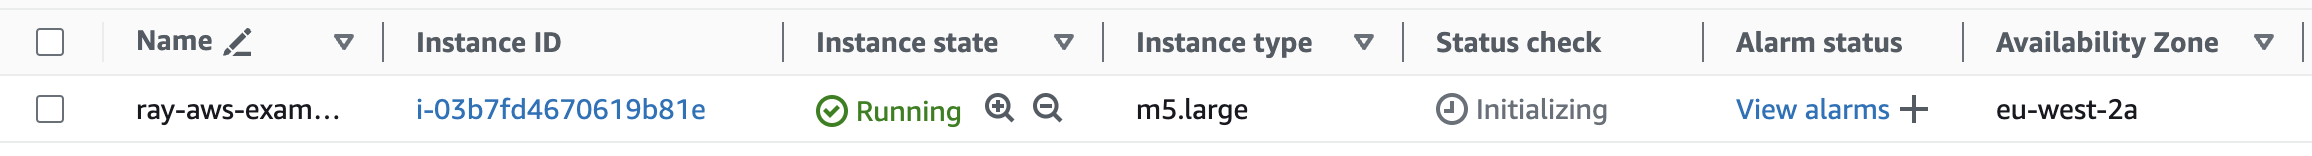

- hmmm my instance is available but my Ray script can't launch SSH commands. Something wrong with config?
  - it's because i manually defined a keypair?
  - see: # How Ray will authenticate with newly launched nodes. from [Ray docs](https://docs.ray.io/en/latest/cluster/vms/references/ray-cluster-configuration.html)
auth:
    ssh_user: ubuntu
#By default Ray creates a new private keypair, but you can also use your own.
#If you do so, make sure to also set "KeyName" in the head and worker node
#configurations below.
#ssh_private_key: /path/to/your/key.pem 

GET CLUSTER URL
- d

### SSH not working
- i've tried `ubuntu` and `ec2user` --nope
- try a different region / default ami --nope
  - try ray full-example and saturn example -- nope
- subnet must map public IPs on instance launch? --YES
  - i was using a default VPC with private and public subnet, it was prioritizing the private one, after deleting that one it works
 
### Get Daft code to run on Ray cluster
- pip install getdaft on worker and head nodes
- 

## Submit Jobs to Ray Cluster

with something like:

```

```